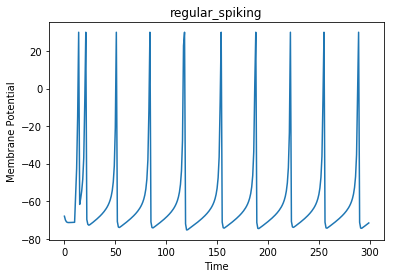

Parameters of the Neuron for regular_spiking : 
 a : 0.02 
 b : 0.2 
 c : -65 
 d : 8
#########################################################################################################






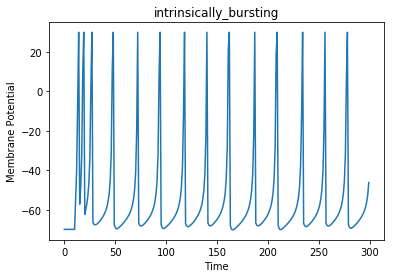

Parameters of the Neuron for intrinsically_bursting : 
 a : 0.02 
 b : 0.2 
 c : -65 
 d : 4
#########################################################################################################






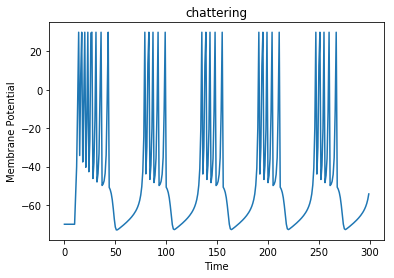

Parameters of the Neuron for chattering : 
 a : 0.02 
 b : 0.2 
 c : -50 
 d : 2
#########################################################################################################






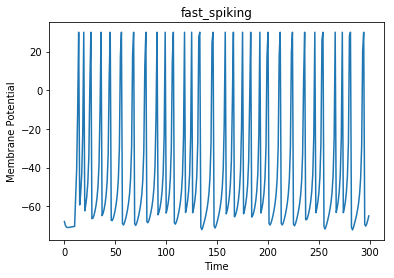

Parameters of the Neuron for fast_spiking : 
 a : 0.1 
 b : 0.2 
 c : -65 
 d : 2
#########################################################################################################






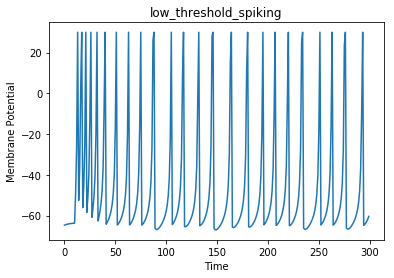

Parameters of the Neuron for low_threshold_spiking : 
 a : 0.02 
 b : 0.25 
 c : -65 
 d : 2
#########################################################################################################






In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

v_threshold = 30

class neuron_model:
    def __init__(self, spike_type):
        self.spike_type = spike_type
        self.a = spike_type['a']
        self.b = spike_type['b']
        self.c = spike_type['c']
        self.d = spike_type['d']
        self.v = spike_type['v']
        self.u = self.b * self.v

spike_type = {'regular_spiking' : {'a':0.02, 'b':0.2, 'c':-65, 'd':8, 'v':-65},
 'intrinsically_bursting' : {'a':0.02, 'b':0.2, 'c':-65, 'd':4, 'v':-70},
 'chattering' : {'a':0.02, 'b':0.2, 'c':-50, 'd':2, 'v':-70},
 'fast_spiking' : {'a':0.1, 'b':0.2, 'c':-65, 'd':2, 'v':-65},
 'low_threshold_spiking' : {'a':0.02, 'b':0.25, 'c':-65, 'd':2, 'v':-65}}

def neuron(v, u, a, b, c, d):
    V = []
    T = []
    U = []
    T1 = 10
    for t in range(0,300):
        #print('hello')
        if (t>T1):
            I = 15
        else:
            I = 0
        v += (0.04*v**2 + 5*v + 140 - u + I)
        u += a*(b*v - u)
        if v>v_threshold:
            V.append(v_threshold)
            v = c
            u = u+d
        else:
            V.append(v)
        U.append(u)
        T.append(t)
    return V, T


for i in spike_type: 
    model = neuron_model(spike_type[i])
    Y, X = neuron(model.v, model.u, model.a, model.b, model.c, model.d)
    plt.xlabel('Time')
    plt.ylabel('Membrane Potential')
    plt.title(i)
    plt.plot(X, Y)
    plt.show()
    print('Parameters of the Neuron for {0} : '.format(i))
    print(' a : {0} \n b : {1} \n c : {2} \n d : {3}'.format(model.a, model.b, model.c, model.d))
    print('#########################################################################################################')
    print('\n')
    print('\n')
    